In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import seaborn as sns
sns.set_theme()

df = pd.read_csv('./data/dulla_pct.csv')
# replace entries of absent with zero
df = df.replace('Absent', 0)
#get only specific columns
df = df[['ID', 'PCT']]
# get codes from ID
df['Code'] = df['ID'].str[4:6]
# rename PCT to marks
df = df.rename(columns={'PCT': 'Marks'})
# convert to numeric
df

,ID,Marks,Code
0,2021B1PS0752P,82.0,B1
1,2021D2TS2084P,18.0,D2
2,2022A2PS0851P,83.5,A2
3,2022A2PS0853P,17.0,A2
4,2022A2PS0928P,87.0,A2
...,...,...,...
585,2022D2TS1553P,41.0,D2
586,2022D2TS1554P,12.5,D2
587,2022D2TS1555P,16.5,D2
588,2022D2TS1556P,38.5,D2


In [14]:
max_marks = 120

Text(0.5, 1.0, 'Marks Distribution')

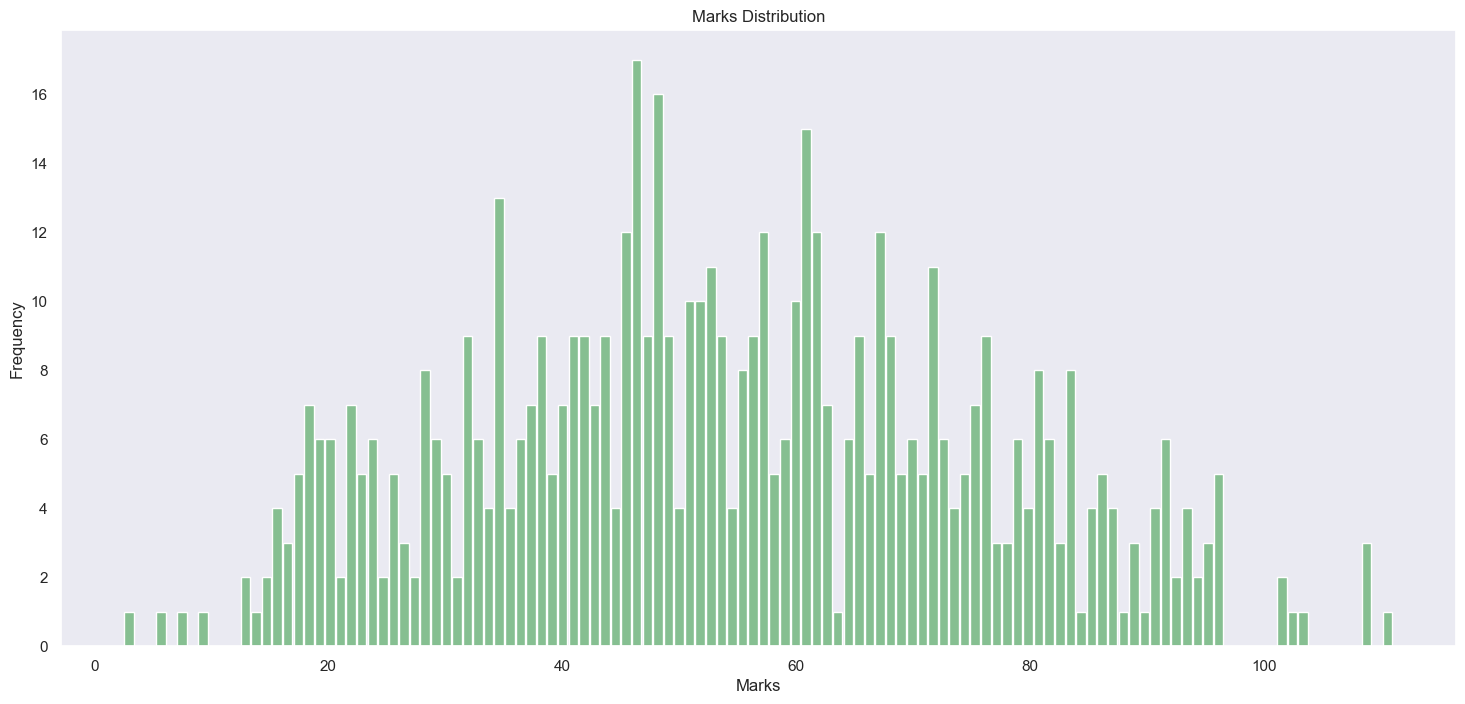

In [16]:
df.hist(column='Marks',bins=max_marks, grid=False, figsize=(18,8), color='#86bf91', zorder=2, rwidth=0.9)
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title('Marks Distribution')

In [17]:
print(f"Mean: {df['Marks'].mean()}")
print(f"Median: {df['Marks'].median()}")

Mean: 53.96864406779661
Median: 53.0


In [20]:
for i in range(70, 90):
    print(f"marks: {i} -> {stats.percentileofscore(df['Marks'], i, kind='weak')}")

marks: 70 -> 76.10169491525423
marks: 71 -> 76.94915254237287
marks: 72 -> 78.8135593220339
marks: 73 -> 79.83050847457626
marks: 74 -> 81.1864406779661
marks: 75 -> 82.20338983050847
marks: 76 -> 83.05084745762711
marks: 77 -> 84.23728813559322
marks: 78 -> 85.08474576271186
marks: 79 -> 86.10169491525423
marks: 80 -> 86.77966101694915
marks: 81 -> 88.13559322033898
marks: 82 -> 89.15254237288136
marks: 83 -> 90.50847457627118
marks: 84 -> 91.1864406779661
marks: 85 -> 91.35593220338983
marks: 86 -> 92.3728813559322
marks: 87 -> 93.38983050847457
marks: 88 -> 93.5593220338983
marks: 89 -> 94.06779661016948


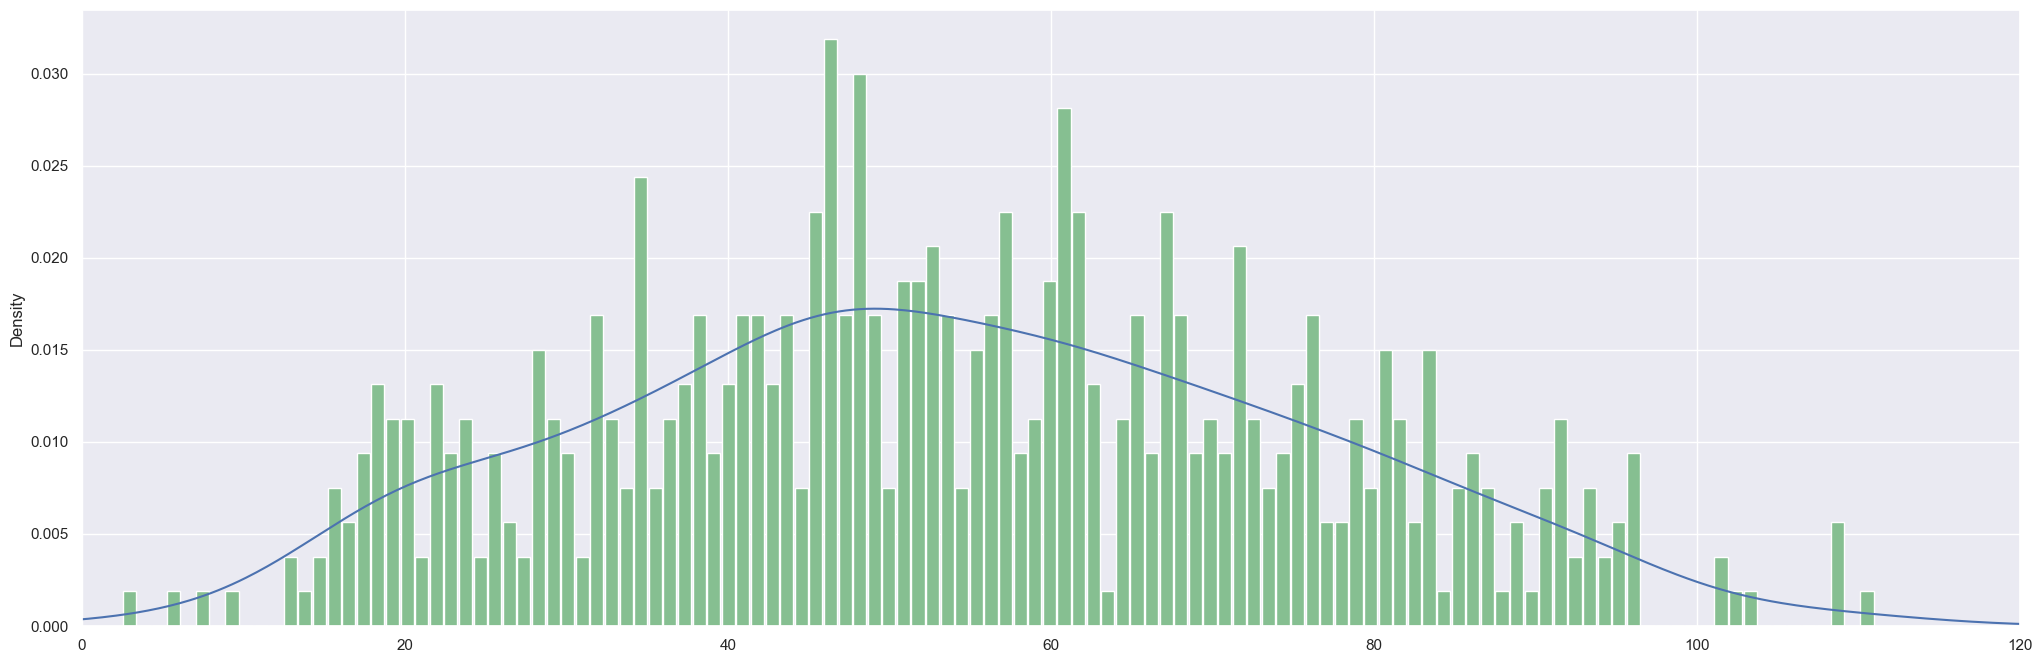

In [21]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", density=True, bins=max_marks, grid=False, figsize=(25,8), color='#86bf91', zorder=2, rwidth=0.9)
df['Marks'].plot(kind = "kde", ax=ax)
ax.set_xlim(0, max_marks)
plt.show()

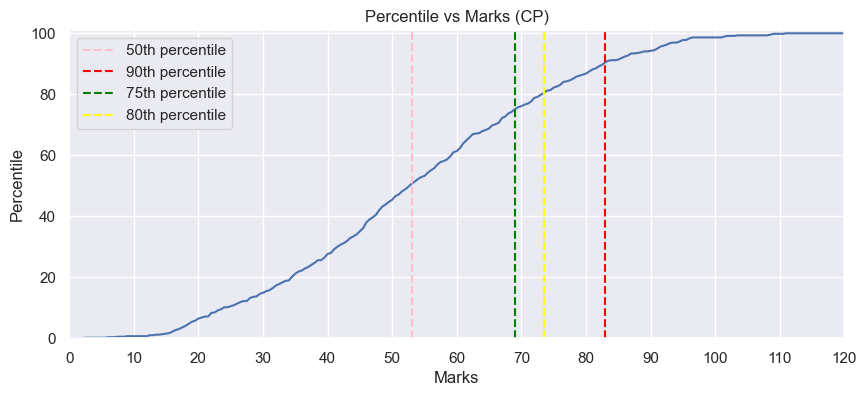

In [22]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (10,4))
fun = lambda k: [i/k for i in list(range(1, max_marks*k + 1))]

a = fun(2)
b = [stats.percentileofscore(df["Marks"],i, kind='weak') for i in a]
ax.plot(a, b)

lis = [i for i in range(0, 101)]

plt.axvline(x=df['Marks'].quantile([0.5]).values[0], color='pink', linestyle='--', label='50th percentile')
plt.axvline(x=df['Marks'].quantile([0.9]).values[0], color='red', linestyle='--', label='90th percentile')
plt.axvline(x=df['Marks'].quantile([0.75]).values[0], color='green', linestyle='--', label='75th percentile')
plt.axvline(x=df['Marks'].quantile([0.8]).values[0], color='yellow', linestyle='--', label='80th percentile')



ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.set_ylim(0,101)
ax.set_xlim(0,max_marks)
ax.set_xlabel("Marks")
ax.set_ylabel("Percentile")
ax.set_title("Percentile vs Marks (CP)")
ax.legend()
plt.show()

<AxesSubplot:>

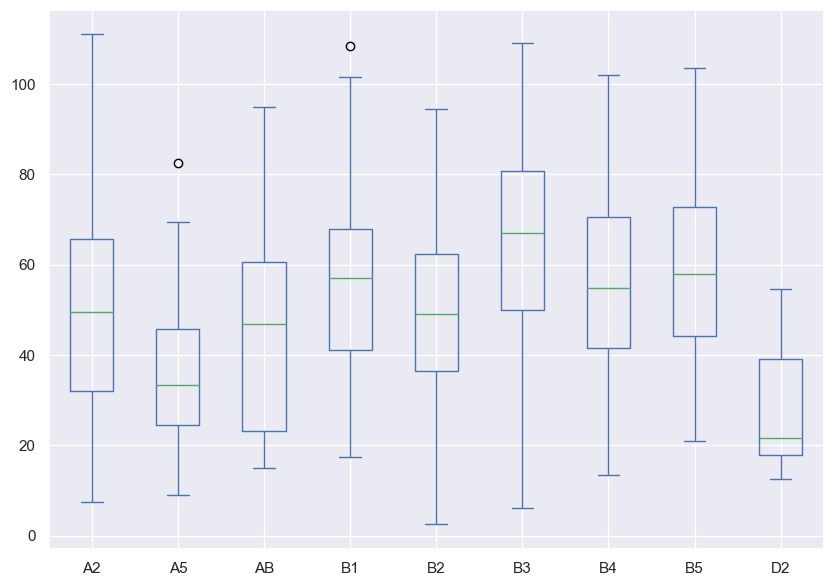

In [24]:
pivot = df.pivot_table(index="ID", columns='Code', values='Marks')
pivot.plot(kind='box', figsize=(10, 7))

In [26]:
b3_df = df[df['Code'] == 'B3']
b3_df

,ID,Marks,Code
313,2022B3PS0212P,89.0,B3
314,2022B3PS0224P,46.0,B3
315,2022B3PS0259P,67.5,B3
316,2022B3PS0267P,70.5,B3
317,2022B3PS0319P,67.0,B3
...,...,...,...
396,2022B3TS1512P,50.0,B3
397,2022B3TS1513P,20.5,B3
398,2022B3TS1517P,81.0,B3
399,2022B3TS1519P,29.5,B3


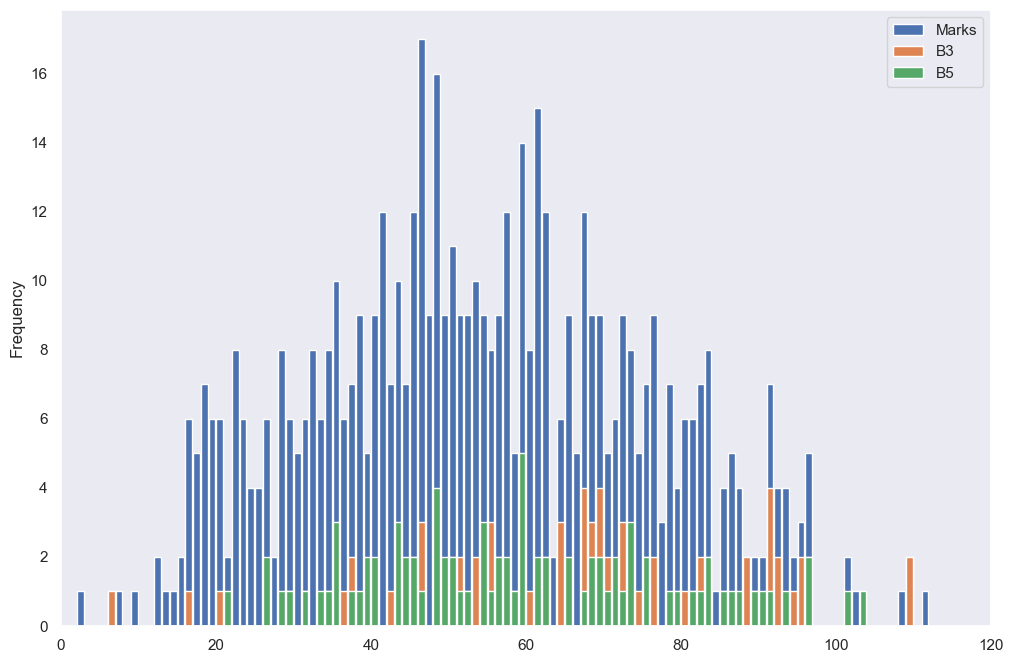

In [31]:
fig, ax = plt.subplots(figsize = (6,4))
df['Marks'].plot(kind = "hist", bins=max_marks, grid=False, range=[0,max_marks], figsize=(12,8), zorder=2, rwidth=0.9)
b3_df['Marks'].plot(kind = "hist", bins=max_marks, grid=False, range=[0,max_marks], figsize=(12,8), zorder=2, rwidth=0.9, label='B3')
df[df['Code'] == 'B5']['Marks'].plot(kind = "hist", bins=max_marks, range=[0,max_marks], grid=False, figsize=(12,8), zorder=2, rwidth=0.9, label = 'B5')
ax.set_xlim(0, max_marks)
plt.legend()
plt.show()